In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("Zomato data.csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [74]:
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0])
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


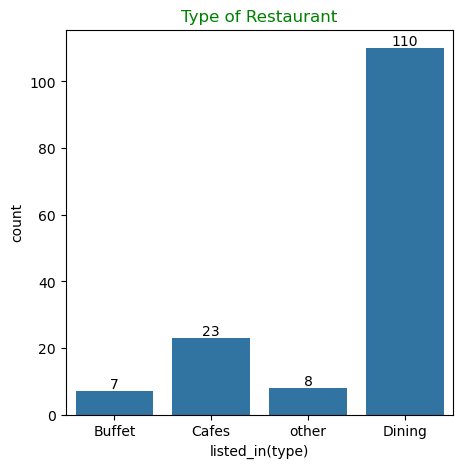

In [35]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data = df, x='listed_in(type)')
ax.bar_label(ax.containers[0],)
plt.title("Type of Restaurant",c="green")
plt.show()

#The majority of the customers choose dining restaurant type.

In [17]:
print(df.head())

                    name online_order book_table rate  votes  \
0                  Jalsa          Yes        Yes  4.1    775   
1         Spice Elephant          Yes         No  4.1    787   
2        San Churro Cafe          Yes         No  3.8    918   
3  Addhuri Udupi Bhojana           No         No  3.7     88   
4          Grand Village           No         No  3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [19]:
gb = df.groupby("listed_in(type)").agg({"votes":'mean'})
print(gb)

                       votes
listed_in(type)             
Buffet            432.571429
Cafes             279.739130
Dining            185.118182
other            1170.875000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


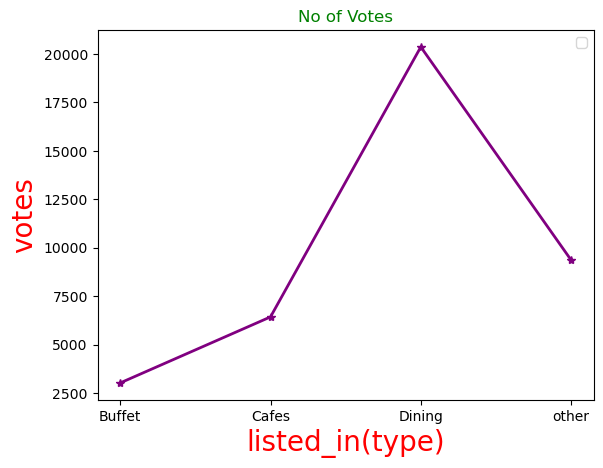

In [32]:
gb1 = df.groupby("listed_in(type)")["votes"].sum()
plot = pd.DataFrame({'votes': gb1})
plt.plot(plot, marker='*', ls='-',lw=2,markersize=6,c="purple")
plt.title("No of Votes",c="green")
plt.xlabel("listed_in(type)",c="red", size=20)
plt.ylabel("votes",c="red",size=20)
plt.legend()
plt.show()

#The majority of customers gives ratings to restaurants.

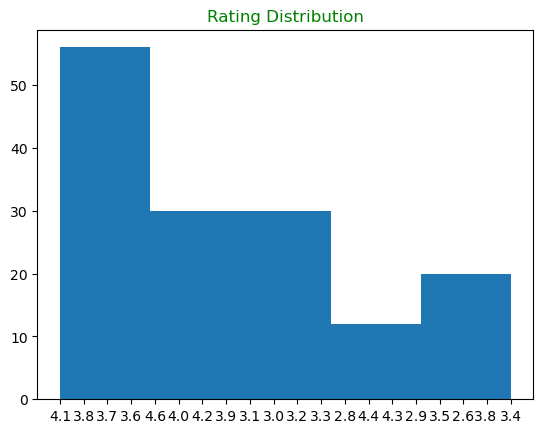

In [43]:
plt.hist(df["rate"],bins=5)
plt.title("Rating Distribution",c="green")
plt.show()

#majority of restaurants received ratings from 3.5 to 4.1

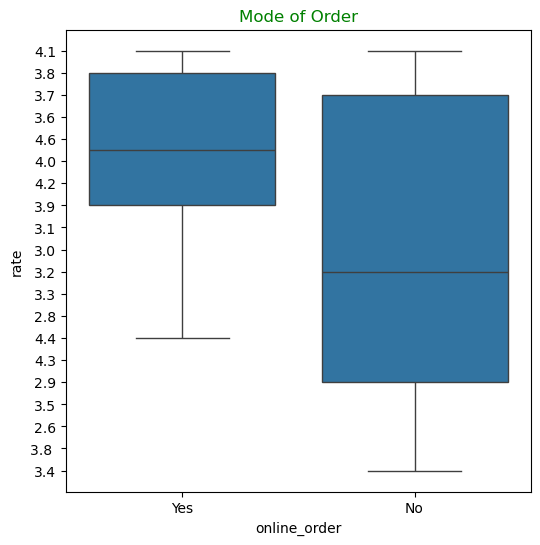

In [49]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x = "online_order",y="rate")
plt.title("Mode of Order",c="green")
plt.show()

#Online orders receive higher ratings than offline orders

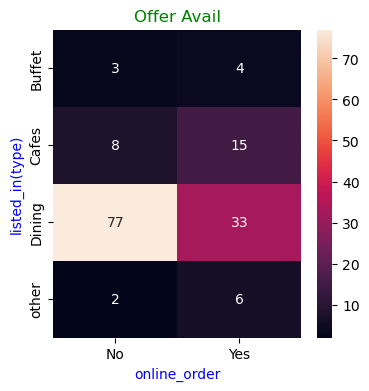

In [66]:
gb2=df.pivot_table(index="listed_in(type)",columns="online_order",aggfunc='size',fill_value=0)
plt.figure(figsize=(4,4))
sns.heatmap(gb2, annot = True,fmt='d')
plt.xlabel("online_order",c="blue")
plt.ylabel("listed_in(type)",c="blue")
plt.title("Offer Avail",c="green")
plt.show()

In [ ]:
#Dining restaurants accept more offline orders.

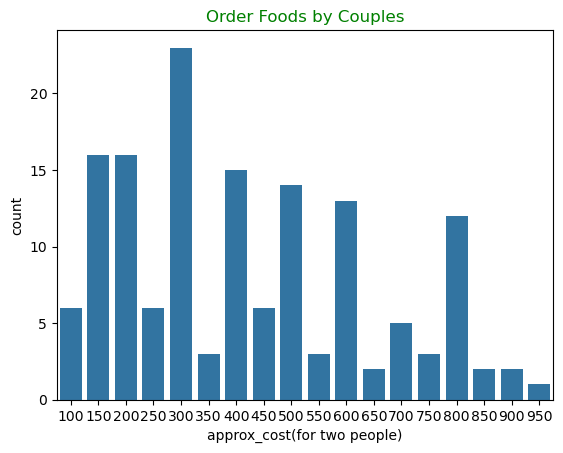

In [77]:
gb3=df["approx_cost(for two people)"]
sns.countplot(x=gb3)
plt.title("Order Foods by Couples",c="green")
plt.show()

#majority of couples prefer restaurants with an approximate cost of 300 rupees.